In [34]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv("Cleaned-Data.csv")
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [36]:
data.shape

(316800, 27)

In [37]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([211200.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 105600.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

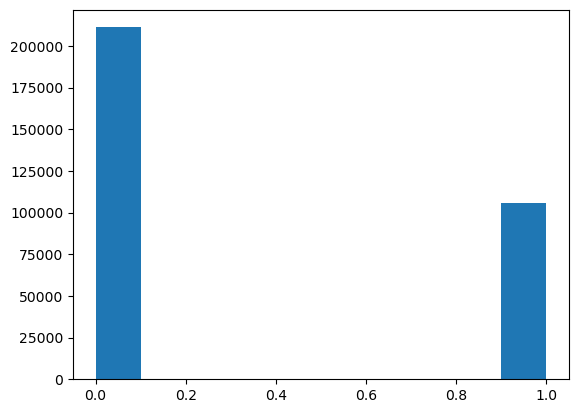

In [40]:
plt.hist(data.Contact_Yes)

In [41]:
predictors_col= ["Fever", "Tiredness", "Dry-Cough", "Difficulty-in-Breathing"]
target_col = ['Contact_Yes']

In [42]:
predictors = data[predictors_col]
target = data[target_col]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [44]:
tree = DecisionTreeClassifier()

In [45]:
arbol = tree.fit(X_train, y_train)

[Text(0.5735294117647058, 0.9, 'x[0] <= 0.5\ngini = 0.444\nsamples = 237600\nvalue = [158689, 78911]'),
 Text(0.3235294117647059, 0.7, 'x[2] <= 0.5\ngini = 0.443\nsamples = 163418\nvalue = [109183, 54235]'),
 Text(0.17647058823529413, 0.5, 'x[1] <= 0.5\ngini = 0.444\nsamples = 74227\nvalue = [49577, 24650]'),
 Text(0.11764705882352941, 0.3, 'x[3] <= 0.5\ngini = 0.443\nsamples = 59404\nvalue = [39700, 19704]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.443\nsamples = 29662\nvalue = [19856, 9806]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.444\nsamples = 29742\nvalue = [19844, 9898]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.445\nsamples = 14823\nvalue = [9877, 4946]'),
 Text(0.47058823529411764, 0.5, 'x[1] <= 0.5\ngini = 0.443\nsamples = 89191\nvalue = [59606, 29585]'),
 Text(0.35294117647058826, 0.3, 'x[3] <= 0.5\ngini = 0.444\nsamples = 44491\nvalue = [29720, 14771]'),
 Text(0.29411764705882354, 0.1, 'gini = 0.444\nsamples = 14845\nvalue = [9914, 4931]'),
 Text(0.4117647058823529,

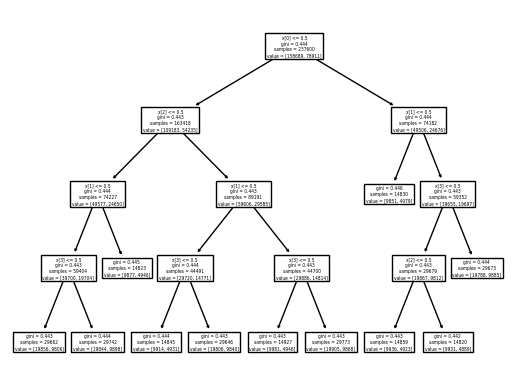

In [46]:
plot_tree(arbol)

In [47]:
predicciones = arbol.predict(X_test)

In [48]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0
Actual,
0,52511
1,26689


In [49]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6630176767676768